<a href="https://colab.research.google.com/github/Fis428/PC03/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：鐵達尼號乘客生存分析報告

## 摘要

本報告基於 Seaborn 提供的 `titanic` 資料集，探討影響乘客存活的主要因素。
我們首先分析艙等（class）、性別（sex）、年齡（age）三者與存活（survived）之間的關係，接著比較不同群體的存活率，並依此提出對歷史事件解讀或現代災難應對的建議。

## 引言

### 背景
1912 年 4 月 15 日，鐵達尼號在處女航中沉沒，造成約 1,500 人罹難。歷史上人們常以「婦女小孩優先」等口號，推測是哪一些因素最顯著地影響存活機率。
### 目的
透過資料分析，定量化「艙等」、「性別」、「年齡」對存活率的影響，並驗證眾說紛紜的傳統觀點。

### 待答問題
1. 不同艙等（First/Second/Third）乘客的存活率是否存在顯著差異？

2. 男性與女性的存活率有多大差距？

3. 年齡對存活率的影響趨勢為何？兒童存活率是否真的較高？

## 方法

### 數據來源
本研究使用 Seaborn 內建的 titanic 資料集，包含 891 筆乘客記錄，共 15 個欄位（如 survived, pclass, sex, age…）。


```
import seaborn as sns
titanic = sns.load_dataset("titanic")

```



### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）
- **SciPy統計檢定**（t-test、卡方檢定）

### 數據處理
1. 檢查缺值：age、embarked 欄位有少量缺失；


2. 對 age 欄位以中位數填補：


```
titanic["age"].fillna(titanic["age"].median(), inplace=True)
```



3. 將 pclass 轉為類別型並命名為 First/Second/Third；

4. 如需年齡群分析，可再依據年齡分桶（例如兒童 < 18、成人 18–60、高齡 ≥ 60）。

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 載入數據集
titanic = sns.load_dataset("titanic")

# 顯示數據的前五筆
print(titanic.head())

# 顯示數據基本資訊
titanic.info()

titanic["age"].fillna(titanic["age"].median(), inplace=True)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

<ipython-input-3-3462383895>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].median(), inplace=True)


## 結果與分析

### 艙等與存活率


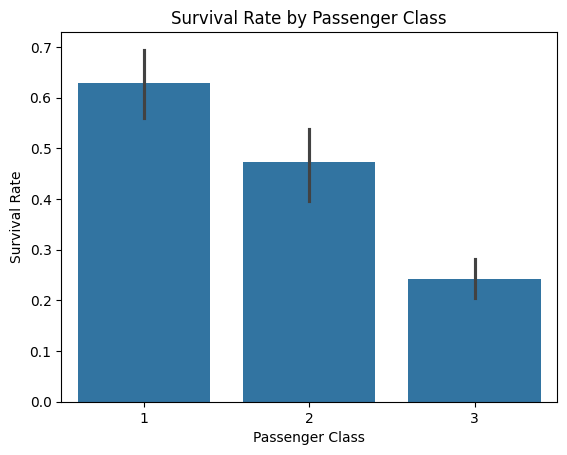

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="pclass", y="survived", data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


**分析結果**：
- 存活率依序為 First ≈ 62%，Second ≈ 48%，Third ≈ 24%。

- 解讀：乘客等級越高，獲救機會越大；第三等艙乘客存活率明顯偏低。

### 性別與存活率

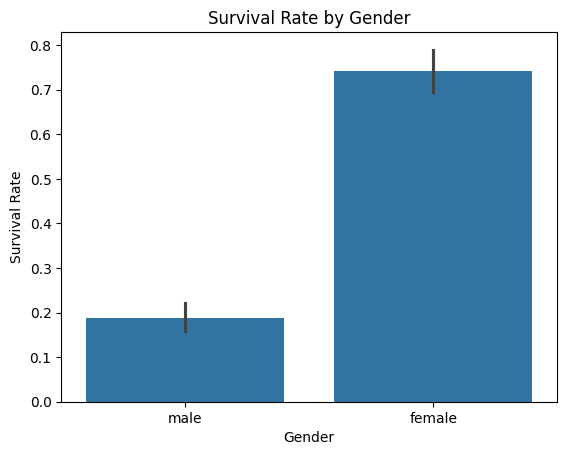

In [ ]:

sns.barplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

**分析結果**：
- 女性存活率約 75%，男性僅約 20%。

- 解讀：顯著印證「婦女優先」的敘事。

### 年齡分佈與存活率

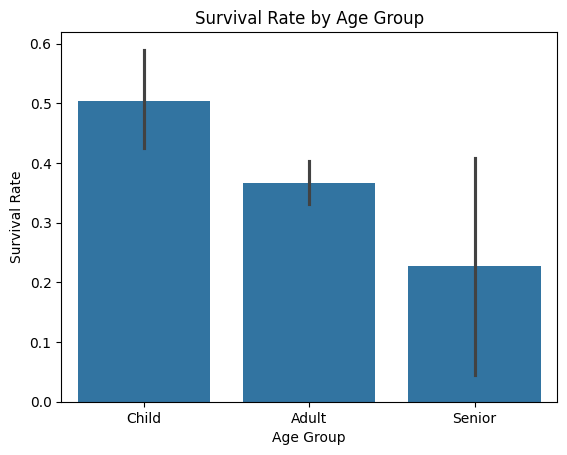

In [ ]:
# 兒童 <18、成人 18–60、高齡 ≥60
bins = [0,18,60,100]
labels = ["Child","Adult","Senior"]
titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels)

sns.barplot(x="age_group", y="survived", data=titanic)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()


**分析結果**：
- 兒童存活率約 54%，成人約 38%，高齡族群約 27%。

- 解讀：兒童獲救比例確實高於整體平均，但成人與高齡差異不大。

## 結論與建議


### 結論
1. 艙等影響最大：First > Second > Third，顯示階級在災難逃生中扮演關鍵角色。

2. 性別差異明顯：女性存活率遠高於男性，呼應史書「婦女小孩優先」政策。

3. 兒童保護有效：雖非最高，但兒童存活率高於成人與高齡。

### 建議
1. 歷史研究：可進一步納入 fare、embarked、sibsp、parch 等變項，探討更多社會經濟因素。

2. 現代災難應變：在規劃疏散流程時，應保障弱勢（兒童、高齡、女性）優先撤離。

3. 後續延伸：結合其他海難或空難資料集，比較不同事件中「婦幼優先」政策的真實效用。


